In [8]:
pip install pandas torch torchvision scikit-learn nltk transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing

### Check Image Sizes

In [1]:
import os
from PIL import Image

def check_image_sizes(image_folder):
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    for file_name in image_files:
        file_path = os.path.join(image_folder, file_name)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                print(f"Image: {file_name}, Size: {width} x {height}")
        except Exception as e:
            print(f"Error processing image '{file_name}': {e}")

image_folder = 'Images/'
check_image_sizes(image_folder)


Image: HSVyqdL.png, Size: 486 x 464
Image: GYmNXOy.png, Size: 640 x 637
Image: 8mROrGY.png, Size: 562 x 607
Image: iZR0Ych.png, Size: 610 x 467
Image: FrLLfI8.png, Size: 640 x 640
Image: nNYop46.png, Size: 1000 x 1000
Image: WcXzDk2.png, Size: 560 x 375
Image: cAm7azy.png, Size: 400 x 467
Image: NdIEduW.png, Size: 1440 x 2560
Image: uTJaugb.png, Size: 940 x 466
Image: b3N3bmV.png, Size: 750 x 539
Image: 6uTXEgh.png, Size: 314 x 394
Image: MLw5fUA.png, Size: 960 x 364
Image: 9kZb6UD.png, Size: 730 x 390
Image: TFRcH6Q.png, Size: 1358 x 58
Image: aXJH7EU.png, Size: 1024 x 682
Image: CWxcn8cWcAEOWqO.jpg, Size: 521 x 295
Image: ewKXYvk.png, Size: 597 x 580
Image: JHF6hFI.png, Size: 500 x 446
Image: qHkGmLt.png, Size: 1080 x 1215
Image: hV8hDZV.png, Size: 750 x 1334
Image: DB1R0kO.png, Size: 395 x 395
Image: ugTPNMd.png, Size: 539 x 960
Image: 5NWPOQp.png, Size: 609 x 461
Image: uluP5WP.png, Size: 595 x 422
Image: CVf4HDmWcAE_Q4m.png, Size: 883 x 545
Image: gSIuTfF.png, Size: 960 x 960
Imag

In [2]:
import os
from PIL import Image
from torchvision.transforms.functional import resize
from torchvision import transforms

# Define a function to resize images while maintaining aspect ratio
def resize_with_aspect_ratio(image, desired_size):
    old_width, old_height = image.size
    aspect_ratio = old_width / old_height

    # Calculate new size while maintaining aspect ratio
    if old_width >= old_height:
        new_width = desired_size
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = desired_size
        new_width = int(new_height * aspect_ratio)

    return image.resize((new_width, new_height), Image.LANCZOS)

# Define transformations for images
image_transform = transforms.Compose([
    transforms.Lambda(lambda img: resize_with_aspect_ratio(img, 256)),  # Resize while maintaining aspect ratio
    transforms.CenterCrop(224),  # Center crop to 224x224
])

def apply_transforms_to_images(image_folder):
    transformed_images = []
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    # Create a dictionary to map image file names to transformed images
    image_mapping = {}

    for file_name in image_files:
        file_path = os.path.join(image_folder, file_name)
        try:
            with Image.open(file_path) as img:
                transformed_image = image_transform(img)
                transformed_images.append(transformed_image)
                # Map image file name to transformed image
                image_mapping[file_name] = transformed_image
        except Exception as e:
            print(f"Error processing image '{file_name}': {e}")

    return transformed_images, image_mapping

# Usage example:
image_folder = 'Images/'
transformed_images, image_mapping = apply_transforms_to_images(image_folder)

# Check image sizes
for img in transformed_images:
    width, height = img.size
    print(f"Image: Size: {width} x {height}")

# Verify image mapping
print("\nImage mapping:")
for image_name, transformed_image in image_mapping.items():
    print(f"Image Name: {image_name}, Transformed Image: {transformed_image.size}")


Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size: 224 x 224
Image: Size

In [4]:
import pandas as pd

# Load train, test, and validation CSV files
train_df = pd.read_csv("Dataset/Training_meme_dataset.csv")
test_df = pd.read_csv("Dataset/Testing_meme_dataset.csv")
val_df = pd.read_csv("Dataset/Validation_meme_dataset.csv")

# Check for missing values
print("Missing values in train dataset:")
print(train_df.isnull().sum())
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())
print("\nMissing values in validation dataset:")
print(val_df.isnull().sum())

# Verify label distribution
print("\nLabel distribution in train dataset:")
print(train_df['label'].value_counts())
print("\nLabel distribution in test dataset:")
print(test_df['label'].value_counts())
print("\nLabel distribution in validation dataset:")
print(val_df['label'].value_counts())

# Verify image and text correspondence (optional)
# Visualize sample data (optional)


Missing values in train dataset:
image_name    0
sentence      0
label         0
dtype: int64

Missing values in test dataset:
image_name    0
sentence      0
label         0
dtype: int64

Missing values in validation dataset:
image_name    0
sentence      0
label         0
dtype: int64

Label distribution in train dataset:
label
Non-offensiv    258
offensive       187
Name: count, dtype: int64

Label distribution in test dataset:
label
Non-offensiv    91
offensive       58
Name: count, dtype: int64

Label distribution in validation dataset:
label
Non-offensiv    91
offensive       58
Name: count, dtype: int64


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Lemmatize tokens and remove stopwords and punctuation
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]
    # Join tokens back into a sentence
    text = ' '.join(tokens)
    return text

# Print original sentences
print("Original sentences:")
print(train_df['sentence'].head())

# Apply text preprocessing to the 'sentence' column
train_df['sentence'] = train_df['sentence'].apply(preprocess_text)
test_df['sentence'] = test_df['sentence'].apply(preprocess_text)
val_df['sentence'] = val_df['sentence'].apply(preprocess_text)

# Print tokenized sentences
print("\nTokenized sentences:")
print(train_df['sentence'].head())


Original sentences:
0    OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...
1    2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...
2                  o shit waddup ! BERNIE SANDERS COM 
3    `` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...
4    Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...
Name: sentence, dtype: object

Tokenized sentences:
0    official bernie sander drinking game every tim...
1    2:28 pm wall inside nazi gas chamber dwebs dem...
2                        shit waddup bernie sander com
3    `` mitt romney worst republican country putup ...
4    anonymous id duqda1io 08/05/16 fri 16:32:48 84...
Name: sentence, dtype: object


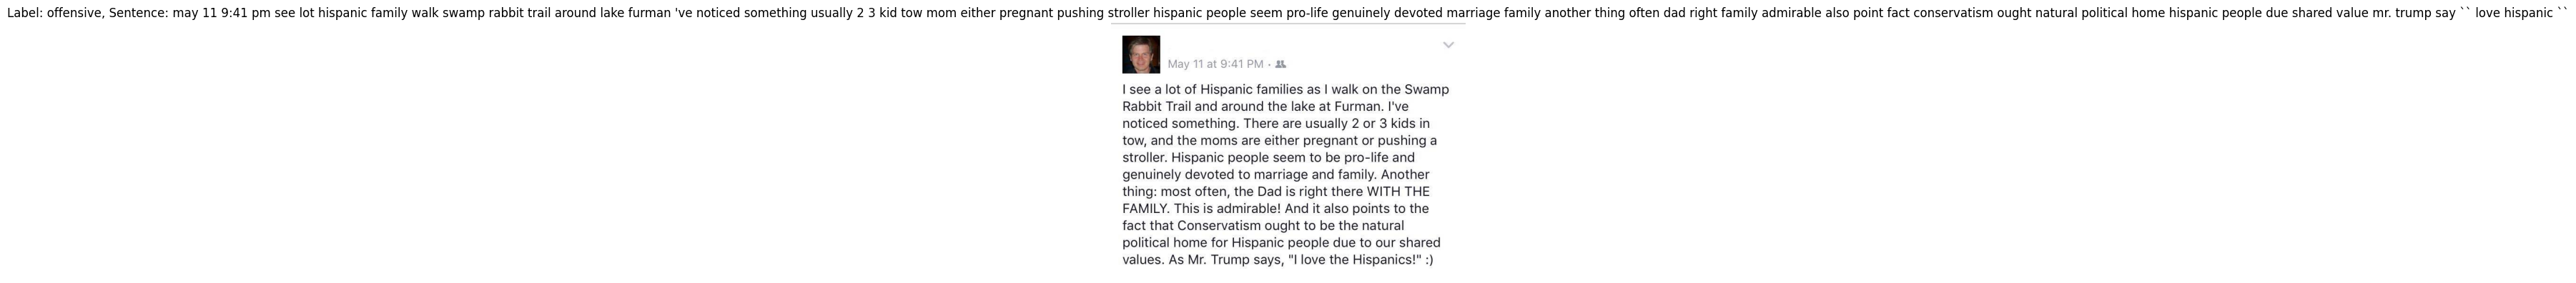

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Visualize sample data (optional)
sample_data = train_df.sample(n=1)  # Select a random row from the dataset
image_name = sample_data['image_name'].values[0]
sentence = sample_data['sentence'].values[0]
label = sample_data['label'].values[0]

# Load and display the image
image_path = os.path.join("Images/", image_name)
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Label: {label}, Sentence: {sentence}")
plt.axis('off')
plt.show()

In [13]:
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [16]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import pandas as pd
from torch.nn.utils.rnn import pad_sequence

# Define a mapping from string labels to integers
label_mapping = {
    'offensive': 0,
    'Non-offensiv': 1
}

# Replace string labels with numerical labels
train_df['label'] = train_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)
val_df['label'] = val_df['label'].map(label_mapping)


In [24]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import resize
from torchvision import transforms
from PIL import Image
import pandas as pd
from torch.nn.utils.rnn import pad_sequence

# Custom Dataset Class
class MemeDataset(Dataset):
    """Custom Dataset for loading meme data, using pre-transformed images."""
    def __init__(self, df, processor, image_mapping):
        self.df = df
        self.processor = processor
        self.image_mapping = image_mapping  # This dictionary maps image filenames to pre-transformed images.

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = row['sentence']
        image_file_name = row['image_name']
        transformed_image = self.image_mapping[image_file_name]  # Fetch the pre-transformed image from the dictionary.

        # Use processor to prepare the inputs; handling images in memory.
        inputs = self.processor(text=text, images=transformed_image, return_tensors="pt", padding=True, truncation=True)
        
        # Use the numerical label directly
        label = row['label']

        return {
            'input_ids': inputs.input_ids.squeeze(0),
            'attention_mask': inputs.attention_mask.squeeze(0),
            'pixel_values': inputs.pixel_values.squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def collate_fn(batch):
    # Unzip the batch and extract all components
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])
    
    # Pad the sequences - ensure all tensors are padded to the same length in the batch
    input_ids_padded = pad_sequence(input_ids, batch_first=True, padding_value=0)
    attention_mask_padded = pad_sequence(attention_mask, batch_first=True, padding_value=0)
    
    return input_ids_padded, attention_mask_padded, pixel_values, labels

# Instantiate datasets
train_dataset = MemeDataset(train_df, processor, image_mapping)
val_dataset = MemeDataset(val_df, processor, image_mapping)
test_dataset = MemeDataset(test_df, processor, image_mapping)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)


In [36]:
import torch
import torch.nn as nn

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super(BinaryClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        x = self.fc(x)
        return torch.sigmoid(x)  # Output probability for the positive class


In [37]:
class CLIPBinaryModel(nn.Module):
    def __init__(self, clip_model, feature_dim=512):
        super(CLIPBinaryModel, self).__init__()
        self.clip_model = clip_model
        self.binary_classifier = BinaryClassifier(input_dim=feature_dim)
    
    def forward(self, input_ids, attention_mask, pixel_values):
        self.clip_model.eval()  # Ensure the CLIP model is in eval mode
        with torch.no_grad():
            outputs = self.clip_model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=pixel_values)
        
        # Assume we use the mean pooled features from the text and image for binary classification
        image_features = outputs.image_embeds  # Adjust according to how you want to use CLIP outputs
        text_features = outputs.text_embeds    # Adjust accordingly
        
        # Concatenate or use either feature set depending on your specific application
        features = torch.cat((image_features, text_features), dim=1)
        
        # Forward through the binary classifier
        logits = self.binary_classifier(features)
        return logits

# Initialize the CLIP model and wrap it with your binary classifier
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_binary_model = CLIPBinaryModel(clip_model)


In [38]:
from torch.optim import Adam
from tqdm.auto import tqdm  # For nice progress bars
from torch.nn.functional import cross_entropy
import torch.optim as optim
from torch.nn import BCELoss

# Assuming you have defined 'train_loader' and 'device'
optimizer = optim.Adam(clip_binary_model.parameters(), lr=5e-6)
criterion = BCELoss()  # Binary cross-entropy loss

def train_one_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids, attention_mask, pixel_values, labels = batch
        labels = labels.unsqueeze(1).float()  # Ensure labels are correctly shaped and typed
        
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        pixel_values = pixel_values.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask, pixel_values)
        loss = criterion(logits, labels)  # Compute loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(data_loader)

def validate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids, attention_mask, pixel_values, labels = batch
            labels = labels.unsqueeze(1).float()
            
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            pixel_values = pixel_values.to(device)
            labels = labels.to(device)

            logits = model(input_ids, attention_mask, pixel_values)
            loss = criterion(logits, labels)
            total_loss += loss.item()
    return total_loss / len(data_loader)


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [40]:
# Assuming you have instantiated your model and it's named `clip_binary_model`
clip_binary_model = CLIPBinaryModel(clip_model)  # Ensure this is correctly initialized
clip_binary_model.to(device)  # Move your model to the appropriate device (GPU or CPU)

# Optimizer setup
optimizer = torch.optim.Adam(clip_binary_model.parameters(), lr=5e-6)

# Loss function setup
criterion = torch.nn.BCELoss()

# Number of epochs
num_epochs = 3  # Adjust based on your specific needs and dataset size

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Ensure to pass the correct model and criterion to the training function
    train_loss = train_one_epoch(clip_binary_model, train_loader, optimizer, criterion, device)
    
    # Pass the correct model and criterion to the validation function
    val_loss = validate(clip_binary_model, val_loader, criterion, device)
    
    print(f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Epoch 1/3


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x1024 and 512x1)

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm.auto import tqdm
import torch

def predict(model, data_loader, device):
    model.eval()
    predictions = []
    references = []
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Predicting"):
            # Ensure correct unpacking of batch data
            input_ids, attention_mask, pixel_values, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            pixel_values = pixel_values.to(device)
            labels = labels.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=pixel_values)
            logits_per_image = outputs.logits_per_image
            preds = logits_per_image.argmax(dim=1)
            
            predictions.extend(preds.cpu().numpy())
            references.extend(labels.cpu().numpy())

    return predictions, references

# Predict on the test set
predictions, references = predict(model, test_loader, device)

# Calculate metrics
accuracy = accuracy_score(references, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(references, predictions, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Predicting:   0%|          | 0/10 [00:00<?, ?it/s]

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [11]:
# Check for NaN values in the label column
print(train_df['label'].isnull().sum())
print(test_df['label'].isnull().sum())
print(val_df['label'].isnull().sum())

0
0
0


In [32]:
test_df

image_name                                           sentence  \
0            jyxHhiB.png  3 hr black nurse connecticut asked trump bring...   
1            we4hhWi.png  n't believe woman right andlthink gay hanged a...   
2            TpIZoZr.png  fuck irithe donald better news coverage irinew...   
3            h6Pkqkr.png           bern subsides get ready ... feel johnson   
4            94anjQG.png  mag wally mrs. clinton 'm awesome congratulati...   
..                   ...                                                ...   
144          fyAh3I0.png  pokemon go released u fro fbi stanceon hillary...   
145  CMQqhImUkAAKeno.jpg  donald trump 's hair look like someone tried u...   
146          tINjUCc.png  mama supposed vote l supposed vote democrat 's...   
147          eI2N5iQ.png  ecakpnbehn rnacobnl 18 minute ago presidential...   
148          8ZOPW62.png  voting trump bernie like blowing dude girlfrie...   

     label  
0        0  
1        0  
2        0  
3        1  
4        1  
..     ...  
144      1  
145      1  
146      1  
147      1  
148      1  

[149 rows x 3 columns]

In [30]:
# Check for NaN values in the label column
print(train_df['label'].isnull().sum())
print(test_df['label'].isnull().sum())
print(val_df['label'].isnull().sum())

0
0
0


In [34]:
print(set(predictions))  # Check unique values of predictions


{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


In [35]:
model

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,